# 1. Import and Understand the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("global_bleaching_environmental.csv")

C:\Users\phamn\AppData\Local\Temp\ipykernel_24180\3241338298.py:1: DtypeWarning: Columns (13,15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("global_bleaching_environmental.csv")


In [3]:
df.head()

,Site_ID,Sample_ID,Data_Source,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Reef_ID,Realm_Name,Ecoregion_Name,Country_Name,...,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Date,Site_Comments,Sample_Comments,Bleaching_Comments
0,2501,10324336,Donner,23.163,-82.5260,Atlantic,nd,Tropical Atlantic,Cuba and Cayman Islands,Cuba,...,5,0,0,0.74,7.25,0.18,15/09/2005,nd,nd,nd
1,3467,10324754,Donner,-17.575,-149.7833,Pacific,nd,Eastern Indo-Pacific,Society Islands French Polynesia,French Polynesia,...,4,0,0.26,0.67,4.65,0.19,15/03/1991,The bleaching does not appear to have gained ...,The bleaching does not appear to have gained ...,nd
2,1794,10323866,Donner,18.369,-64.5640,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United Kingdom,...,7,0,0,1.04,11.66,0.26,15/01/2006,nd,nd,nd
3,8647,10328028,Donner,17.760,-64.5680,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,4,0,0,0.75,5.64,0.2,15/04/2006,nd,nd,nd
4,8648,10328029,Donner,17.769,-64.5830,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,5,0,0,0.92,6.89,0.25,15/04/2006,nd,nd,nd


In [4]:
df.describe()

,Site_ID,Sample_ID,Latitude_Degrees,Longitude_Degrees,Cyclone_Frequency,Date_Day,Date_Month,Date_Year
count,4.136100e+04,4.136100e+04,41361.000000,41361.000000,41361.000000,41361.000000,41361.000000,41361.000000
mean,7.455816e+04,1.012880e+07,7.558085,34.966127,52.159650,16.037402,6.902686,2007.796765
std,2.520418e+05,1.373151e+06,15.732185,103.404598,7.589593,7.837400,2.875063,6.073043
min,1.000000e+00,9.623000e+03,-30.262500,-179.974300,18.310000,1.000000,1.000000,1980.000000
25%,3.502000e+03,1.031108e+07,-4.902500,-78.385600,47.940000,10.000000,5.000000,2003.000000
50%,5.925000e+03,1.031628e+07,10.776100,96.843300,50.920000,15.000000,7.000000,2007.000000
75%,8.368000e+03,1.032149e+07,20.050500,120.880400,55.730000,22.000000,9.000000,2013.000000
max,1.000060e+06,1.033171e+07,36.750000,179.964500,105.800000,31.000000,12.000000,2020.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41361 entries, 0 to 41360
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Site_ID                                41361 non-null  int64  
 1   Sample_ID                              41361 non-null  int64  
 2   Data_Source                            41361 non-null  object 
 3   Latitude_Degrees                       41361 non-null  float64
 4   Longitude_Degrees                      41361 non-null  float64
 5   Ocean_Name                             41361 non-null  object 
 6   Reef_ID                                41361 non-null  object 
 7   Realm_Name                             41361 non-null  object 
 8   Ecoregion_Name                         41361 non-null  object 
 9   Country_Name                           41361 non-null  object 
 10  State_Island_Province_Name             41361 non-null  object 
 11  Ci

Before proceeding to null value checks, remove the following columns to streamline the dataset and optimize memory usage:
- Unique identifiers (e.g., Reef_ID, Site_ID) as they are not useful for EDA or machine learning.
- Highly granular columns (e.g., Data_Source, Ecoregion_Name, Country_Name) with 50+ unique values, which are too detailed for effective EDA or encoding for machine learning - models.
- Redundant or uninformative columns (e.g., Realm_Name, derived from Ocean_Name; SSTA_Mean, containing only 0 or NaN values) as they provide no meaningful information.
- Date column since we already have Date_Day, Date_Month, Date_Year
- Other columns such as SSGTA_Minimum, TSA_Maximum, etc becuase they all reflect similar trends from the parent features (like SSTA, or TSA). Adding them might overfit the models


In [6]:
df.drop(['Reef_ID', 'State_Island_Province_Name', 'City_Town_Name', 'Site_Name', 'Site_Comments', 
              'Sample_Comments', 'Bleaching_Comments', 'Site_ID', 'Sample_ID','Data_Source', 'Ecoregion_Name', 
              'Country_Name', 'Realm_Name', 'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation', 
              'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum','SSTA_Standard_Deviation', 'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation',
              'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW', 'SSTA_DHW_Standard_Deviation',
              'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum',
              'TSA_Mean', 'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax',
              'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation', 'TSA_DHWMax', 'TSA_DHWMean', 'Date'], axis=1, inplace=True)

In [7]:
df.head()

,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Distance_to_Shore,Exposure,Turbidity,Cyclone_Frequency,Date_Day,Date_Month,Date_Year,Depth_m,Substrate_Name,Percent_Cover,Bleaching_Level,Percent_Bleaching,ClimSST,Temperature_Kelvin,Windspeed,SSTA,TSA
0,23.163,-82.5260,Atlantic,8519.23,Exposed,0.0287,49.90,15,9,2005,10,nd,nd,nd,50.2,301.61,302.05,8,-0.46,-0.8
1,-17.575,-149.7833,Pacific,1431.62,Exposed,0.0262,51.20,15,3,1991,14,nd,nd,nd,50.7,262.15,303.3,2,1.29,1.29
2,18.369,-64.5640,Atlantic,182.33,Exposed,0.0429,61.52,15,1,2006,7,nd,nd,nd,50.9,298.79,299.18,8,0.04,-2.64
3,17.760,-64.5680,Atlantic,313.13,Exposed,0.0424,65.39,15,4,2006,9.02,nd,nd,nd,50.9,300.16,299.61,3,-0.07,-2.27
4,17.769,-64.5830,Atlantic,792.0,Exposed,0.0424,65.39,15,4,2006,12.5,nd,nd,nd,50.9,300.15,299.7,3,0,-2.19


# 2. Data cleaning

## 2.1 Missing values

### 1. Identify missing values


In [8]:
df = df.replace("nd", np.nan)


missing_values = df.isnull().sum()
missing_perct = (missing_values / len(df)) * 100

missing_df = pd.DataFrame(
      {'Missing Count' : missing_values,
      'Missing Percentage' : missing_perct
})

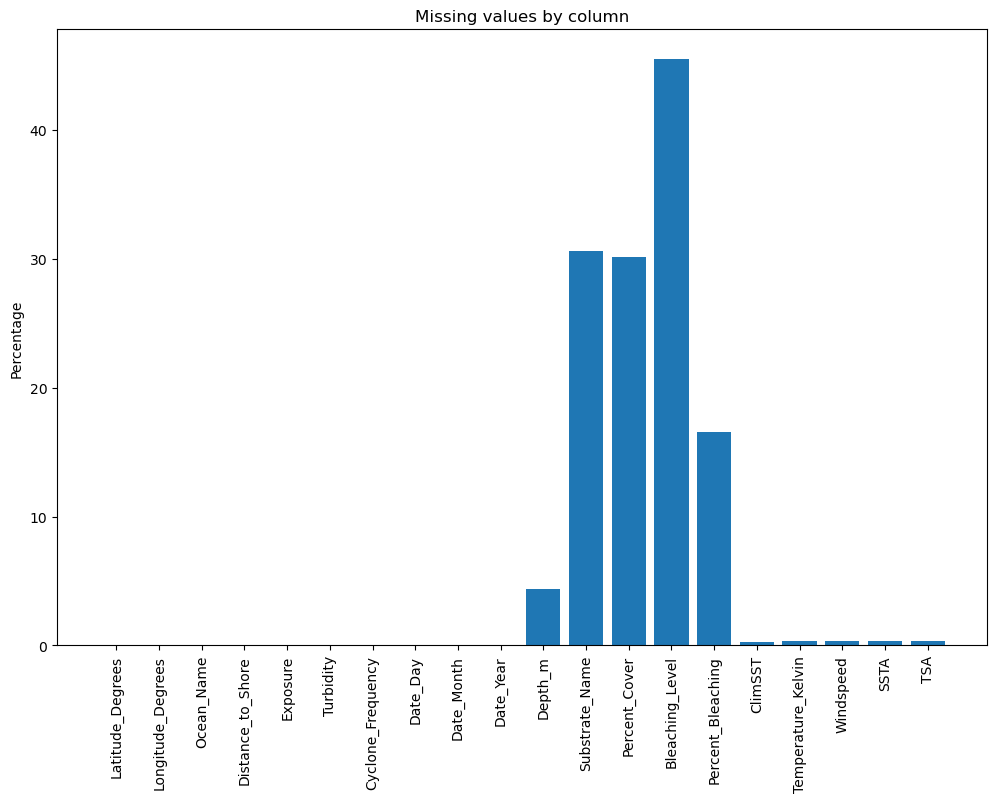

In [9]:
plt.figure(figsize = (12, 8))
plt.bar(missing_df.index, missing_df['Missing Percentage'])
plt.xticks(rotation = 90)
plt.title("Missing values by column")
plt.ylabel("Percentage")
plt.show();

### 2. Handle missing values


Drop the Bleaching_Level column due to excessive missing data. Although described as containing both coral population and coral colony data, the dataset only includes coral population, with coral colony data entirely absent. Similar with Substrate_Name, when over 30% values are missing

In [10]:
df = df.drop(['Bleaching_Level', 'Substrate_Name'], axis =1)

Numerical columns like Depth_m, Percent_Cover, etc., contain missing values. Dropping these rows is not ideal, as it would remove valuable data from other columns. Instead, I use statistical imputation: apply the mean for SSTA, SSTA_FrequencyMax, Cyclone_Frequency, Temperature_Maximum, TSA (normally/close to normally distributed) and the median for other skewed numerical columns. First, convert these columns from object data types to appropriate numerical types before imputation.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41361 entries, 0 to 41360
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Latitude_Degrees    41361 non-null  float64
 1   Longitude_Degrees   41361 non-null  float64
 2   Ocean_Name          41361 non-null  object 
 3   Distance_to_Shore   41359 non-null  object 
 4   Exposure            41361 non-null  object 
 5   Turbidity           41355 non-null  object 
 6   Cyclone_Frequency   41361 non-null  float64
 7   Date_Day            41361 non-null  int64  
 8   Date_Month          41361 non-null  int64  
 9   Date_Year           41361 non-null  int64  
 10  Depth_m             39562 non-null  object 
 11  Percent_Cover       28906 non-null  object 
 12  Percent_Bleaching   34515 non-null  object 
 13  ClimSST             41248 non-null  object 
 14  Temperature_Kelvin  41213 non-null  object 
 15  Windspeed           41232 non-null  object 
 16  SSTA

In [12]:
cols_to_float = [
    'Distance_to_Shore','Turbidity','Cyclone_Frequency','Depth_m','Percent_Cover','Percent_Bleaching','ClimSST',
    'Temperature_Kelvin','Windspeed','SSTA','TSA']

for col in cols_to_float:
    df[col] = df[col].astype('float64')

In [13]:
df['SSTA'] = df['SSTA'].fillna(df['SSTA'].mean())
df['TSA'] = df['TSA'].fillna(df['TSA'].mean())
df['Cyclone_Frequency'] = df['Cyclone_Frequency'].fillna(df['Cyclone_Frequency'].mean())


cols_to_impute_median = ['Distance_to_Shore','Turbidity','Depth_m','Percent_Cover','Percent_Bleaching','ClimSST',
    'Temperature_Kelvin','Windspeed']
for col in cols_to_impute_median:
    df[col] = df[col].fillna(df[col].median())

## 2.2 Duplicate value

In [14]:
df.duplicated().sum()

180

In [15]:
df = df.drop_duplicates()

## 2.3 Label Encoding

As I use Percent_Bleaching as a target for classification models, I found that based on the Bleaching_Comments, percent bleaching are categorized into 3 groups:

- Mild (1-10% bleached)
- Moderate (11-50% bleached)
- Severe (>50% Bleached)
Therefore I group these percent_bleaching into 3 above categories

In [16]:
def classify_bleaching(percent_bleaching):
    percent_bleaching = float(percent_bleaching)
    if 0 <= percent_bleaching <= 10:
        return 'Mild'
    elif 11 <= percent_bleaching <= 50:
        return 'Moderate'
    else:
        return 'Severe'

df['Percent_Bleaching_Category'] = df['Percent_Bleaching'].apply(classify_bleaching)

In [17]:
list(df.select_dtypes('object'))

['Ocean_Name', 'Exposure', 'Percent_Bleaching_Category']

In [18]:
from sklearn.preprocessing import OrdinalEncoder
# Apply ordinal encoding
ordinal_features = ['Percent_Bleaching_Category', 'Exposure']
category_order = [
    ['Mild', 'Moderate', 'Severe'],     
    ['Sheltered', 'Sometimes', 'Exposed']
]
encoder = OrdinalEncoder(categories=category_order)
df[ordinal_features] = encoder.fit_transform(df[ordinal_features])

In [19]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
encoded = ohe.fit_transform(df[['Ocean_Name']])

encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['Ocean_Name']))

df = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)

## 2.4 Convert datatype

As continous values were already converted to float, I only need to convert columns that I just applied Ordinal Encoding and One Hot Encoding

I also need to covert Data to date time format

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41181 entries, 0 to 41180
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Latitude_Degrees            41181 non-null  float64
 1   Longitude_Degrees           41181 non-null  float64
 2   Ocean_Name                  41181 non-null  object 
 3   Distance_to_Shore           41181 non-null  float64
 4   Exposure                    41181 non-null  float64
 5   Turbidity                   41181 non-null  float64
 6   Cyclone_Frequency           41181 non-null  float64
 7   Date_Day                    41181 non-null  int64  
 8   Date_Month                  41181 non-null  int64  
 9   Date_Year                   41181 non-null  int64  
 10  Depth_m                     41181 non-null  float64
 11  Percent_Cover               41181 non-null  float64
 12  Percent_Bleaching           41181 non-null  float64
 13  ClimSST                     411

In [21]:
df['Exposure'] = df['Exposure'].astype('category')
df['Percent_Bleaching_Category'] = df['Percent_Bleaching_Category'].astype('category')

OHE_columns = ['Ocean_Name_Atlantic', 'Ocean_Name_Indian', 'Ocean_Name_Pacific', 'Ocean_Name_Red Sea']
for col in OHE_columns:
    df[col] = df[col].astype('category')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41181 entries, 0 to 41180
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Latitude_Degrees            41181 non-null  float64 
 1   Longitude_Degrees           41181 non-null  float64 
 2   Ocean_Name                  41181 non-null  object  
 3   Distance_to_Shore           41181 non-null  float64 
 4   Exposure                    41181 non-null  category
 5   Turbidity                   41181 non-null  float64 
 6   Cyclone_Frequency           41181 non-null  float64 
 7   Date_Day                    41181 non-null  int64   
 8   Date_Month                  41181 non-null  int64   
 9   Date_Year                   41181 non-null  int64   
 10  Depth_m                     41181 non-null  float64 
 11  Percent_Cover               41181 non-null  float64 
 12  Percent_Bleaching           41181 non-null  float64 
 13  ClimSST         

# 3. Exploratory Data Analysis (EDA)

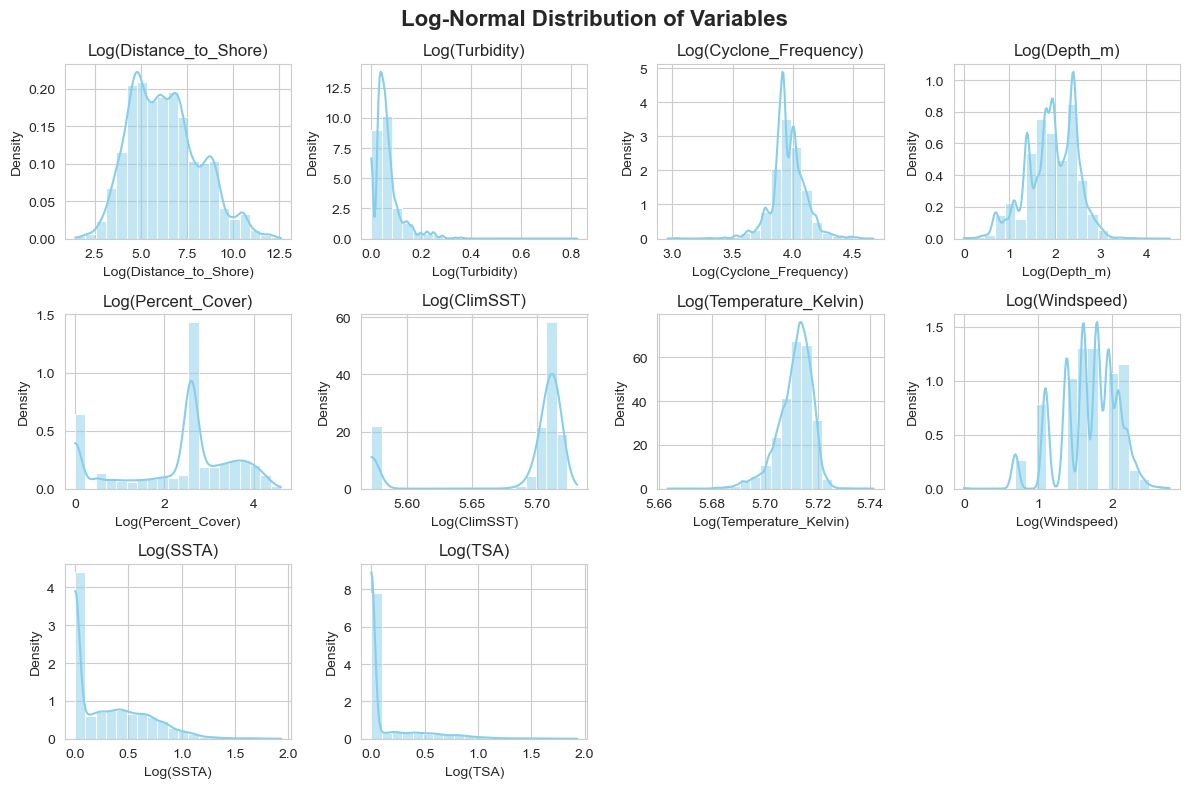

In [23]:
continuous_cols = ['Distance_to_Shore', 'Turbidity', 'Cyclone_Frequency', 'Depth_m',
    'Percent_Cover', 'ClimSST',
    'Temperature_Kelvin', 'Windspeed', 'SSTA', 'TSA'
]

sns.set_style("whitegrid")

def plot_histograms(cols, rows, cols_grid, title):
    fig, axes = plt.subplots(rows, cols_grid, figsize=(12, 8))
    axes = axes.flatten()
    fig.suptitle(title, fontsize=16, fontweight='bold')


    for i, col in enumerate(cols):
        # Apply log transformation
        log_data = np.log1p(df[col].clip(lower=0))  
        sns.histplot(x=log_data, bins=20, stat='density', kde=True, ax=axes[i], color='skyblue')
        axes[i].set_title(f'Log({col})', fontsize=12)
        axes[i].set_xlabel(f'Log({col})', fontsize=10)
        axes[i].set_ylabel("Density", fontsize=10)

    for j in range(len(cols), rows * cols_grid):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

plot_histograms(continuous_cols, rows=3, cols_grid=4, title="Log-Normal Distribution of Variables")
    

#### SSTA

- The SSTA (Sea Surface Temperature Anomaly) distribution is centered around 0, indicating that temperature anomalies are generally small but can reach extreme values (up 20°C for maximums)

##### TSA

- TSA (Thermal Stress Anomaly) follows a similar pattern to SSTA, centered around 0 with a slight skew, and maxima extending to 5°C, reflecting intense thermal stress events.


#### Temperature and other Continous variables

- Temperature are clustered around 300-305 Kelvin (26–31°C), with maxima extending to 312 Kelvin (39°C), indicating a range of thermal conditions.
- Depth_m and Distance_to_Shore: Both are right-skewed, with Depth_m peaking around 0–20 meters and Distance_to_Shore around 0–50000 meters, indicating most reefs are in shallow, near-shore environments with some deep or distant outliers.
- Percent_Cover is right-skewed with a peak around 0–20%, suggesting low coral cover in many areas, while ClimSST (Climatological Sea Surface Temperature) is around 300 Kelvin (27°C), reflecting baseline temperature conditions.
- Turbidity, Cyclone_Frequency, Windspeed: Apart from Cyclone, two remaining variables are right-skewed, with Turbidity and Windspeed peaking near 0–0.5 (m⁻¹) and 5 (m/s), respectively, and Cyclone_Frequency around 40-60 events, indicating variable environmental stressors with infrequent high-impact events.

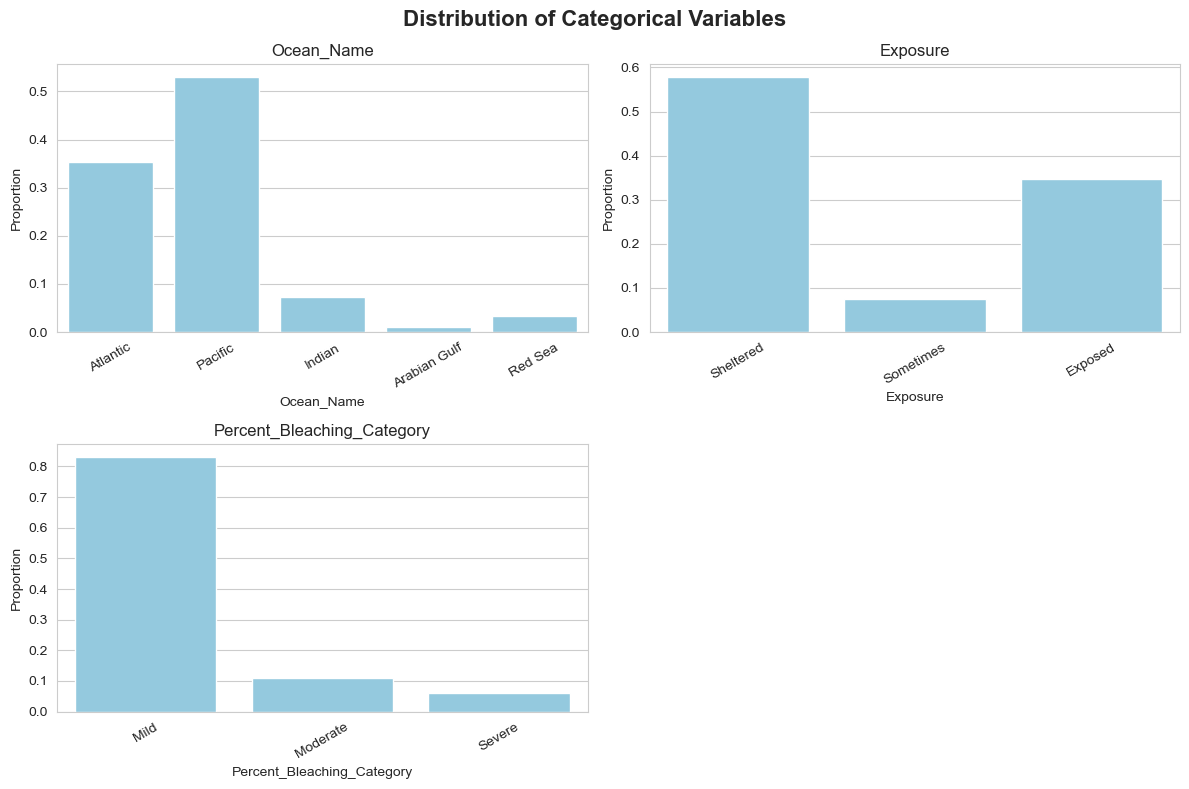

In [24]:
df1 = df.copy(deep=True)

exposure_mapping = {0: 'Sheltered', 1: 'Sometimes', 2: 'Exposed'}
percent_bleaching_cat_mapping = {0: 'Mild', 1: 'Moderate', 2: 'Severe'}

df1['Exposure'] = df1['Exposure'].map(exposure_mapping)
df1['Percent_Bleaching_Category'] = df1['Percent_Bleaching_Category'].map(percent_bleaching_cat_mapping)

cat_cols = ["Ocean_Name", "Exposure", "Percent_Bleaching_Category"]

rows, cols = 2, 2
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
axes = axes.flatten()

fig.suptitle("Distribution of Categorical Variables", fontsize=16, fontweight='bold')

for i, col in enumerate(cat_cols):
    sns.countplot(data=df1, x=col, stat='probability', ax=axes[i], color='skyblue')
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Proportion", fontsize=10)
    axes[i].tick_params(axis='x', rotation=30)

for j in range(len(cat_cols), rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Ocean_Name: The Pacific Ocean dominates with the highest count, followed by the Atlantic, Indian, Arabian Gulf, and Red Sea, suggesting the Pacific is the most studied or affected region.
- Exposure: Most sites are classified as Sheltered, with fewer Sometimes or Exposed sites, indicating a bias toward protected reef environments.
- Percent_Bleaching_Category: The majority of observations fall into the "Slow" category, with fewer "Mild," "Moderate," and minimal "Severe" cases, suggesting that severe bleaching is less frequent but still significant.

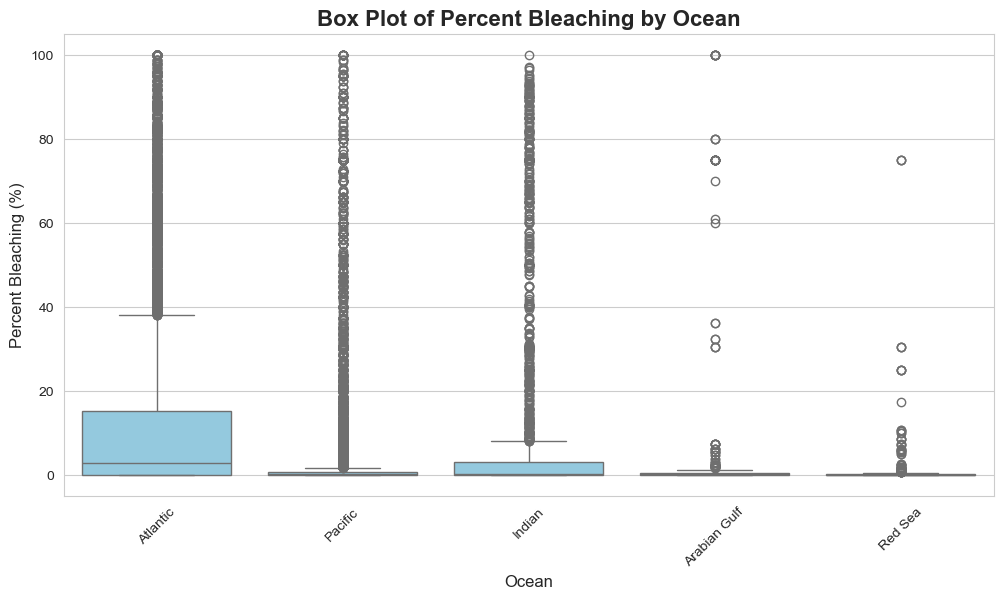

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ocean_Name', y='Percent_Bleaching', data=df1, color='skyblue')
plt.title('Box Plot of Percent Bleaching by Ocean', fontsize=16, fontweight='bold', fontname='Arial')
plt.xticks(rotation=45)
plt.ylabel('Percent Bleaching (%)', fontsize=12)
plt.xlabel('Ocean', fontsize=12)
plt.show()

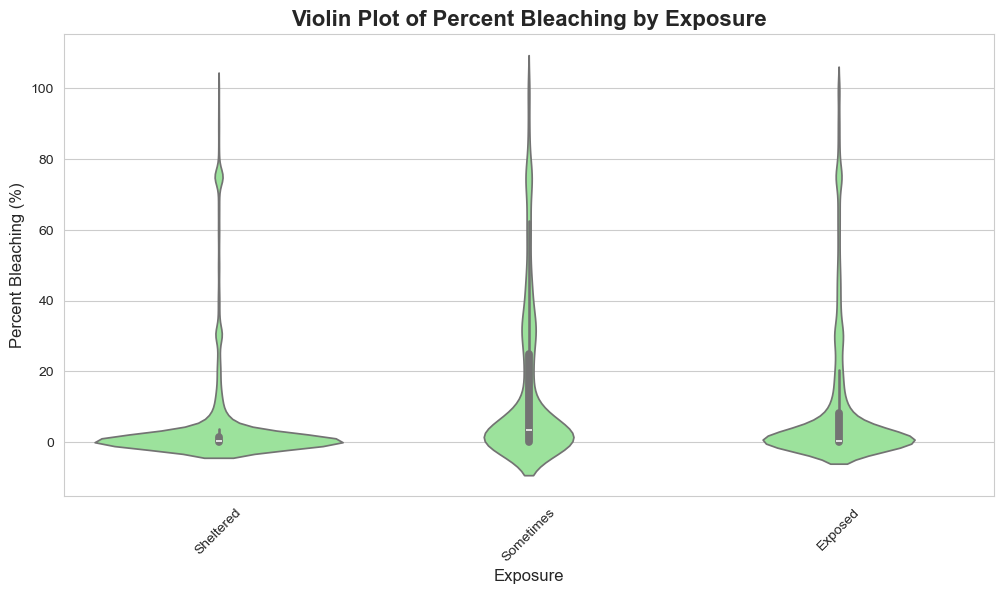

In [26]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Exposure', y='Percent_Bleaching', data=df1, color='lightgreen')
plt.title('Violin Plot of Percent Bleaching by Exposure', fontsize=16, fontweight='bold', fontname='Arial')
plt.xticks(rotation=45)
plt.ylabel('Percent Bleaching (%)', fontsize=12)
plt.xlabel('Exposure', fontsize=12)
plt.show()

- The Pacific Ocean exhibits the highest count of bleaching observations across all severity categories, with a dominant presence in the "Mild" category, indicating it is the most affected region. The Atlantic also shows a significant "Mild" bleaching count, though lower than the Pacific.
- Sheltered sites have the highest count of "Mild" bleaching, followed by moderate counts of "Moderate" and "Severe" cases, suggesting that protected environments are more commonly observed but still experience varying bleaching levels.

Text(0, 0.5, 'Percent Bleaching')

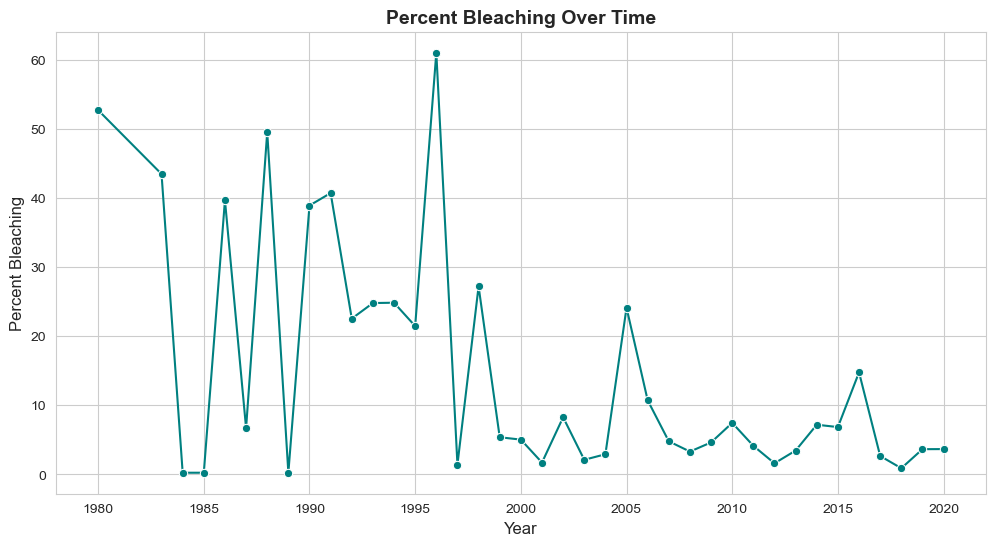

In [27]:
# Group by year and calculate mean Percent_Bleaching
plt.figure(figsize=(12, 6))
grouped = df.groupby('Date_Year')['Percent_Bleaching'].mean().reset_index()
sns.lineplot(x='Date_Year', y='Percent_Bleaching', data=grouped, marker='o', color='teal')

plt.title("Percent Bleaching Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percent Bleaching", fontsize=12)

- The graph illustrates notable bleaching percentages from 1980 to 2020, with pronounced peaks in the mid-1990s and early 2000s, corresponding to major global bleaching events, such as the one in 1998. Following the early 2000s peak, the data shows a general decline, with a noticeable dip during the 2010s. This temporal trend highlights the recurring nature of environmental stress events and emphasizes the increasing impact of factors like rising sea surface temperatures over time.

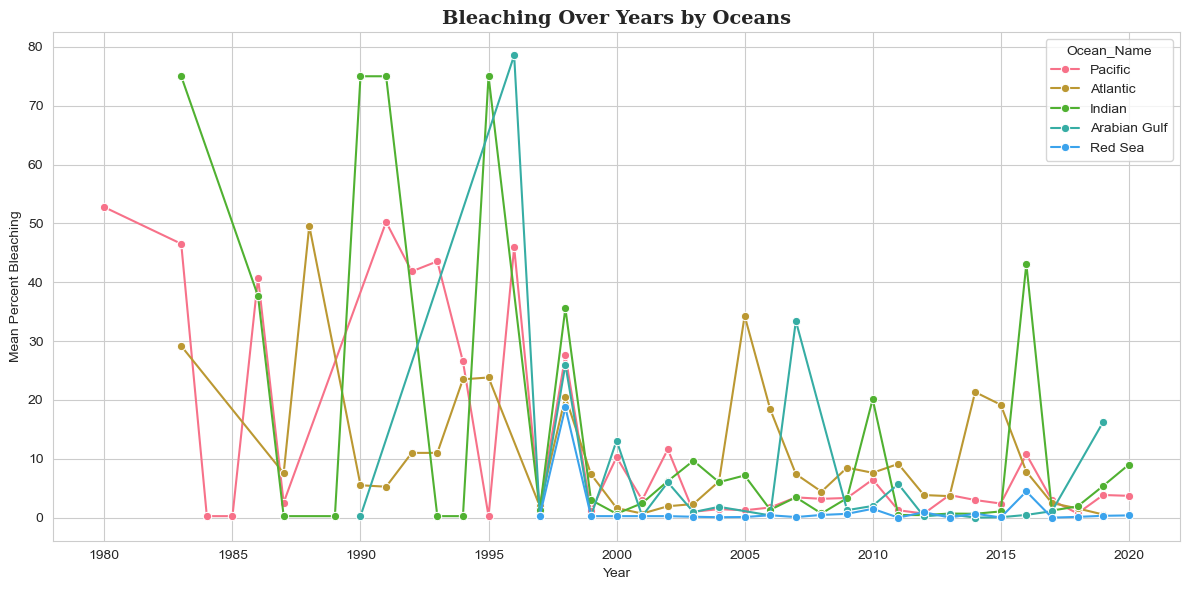

In [28]:
plt.figure(figsize=(12, 6))
sns.set_palette("husl")
bleaching_trend = df.groupby(['Date_Year', 'Ocean_Name'])['Percent_Bleaching'].mean().reset_index()
sns.lineplot(data=bleaching_trend, x='Date_Year', y='Percent_Bleaching', hue='Ocean_Name', marker='o')
plt.title("Bleaching Over Years by Oceans", fontsize=14, fontweight='bold', fontfamily='serif')
plt.xlabel("Year", fontsize=10)
plt.ylabel("Mean Percent Bleaching", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

- Although from the Univariate Analysis above, the Pacific Ocean experienced the most occurence of bleaching events, from this graph, Indian and Arabian Gulf actually exhibit the highest bleaching levels, with peaks in Indian around 75% and close to 80% (the highest of all time) in Arabian Gulf around the mid-1990s and early 2000s, aligning with global mass bleaching events. The Pacific shows moderate peaks (around 50%) in the same periods, while the Atlantic and Red Sea have lower and more sporadic peaks (below 50%). Post-2000, bleaching levels generally decline across all oceans but show some spikes, particularly in the Indian Ocean around 2015–2020.

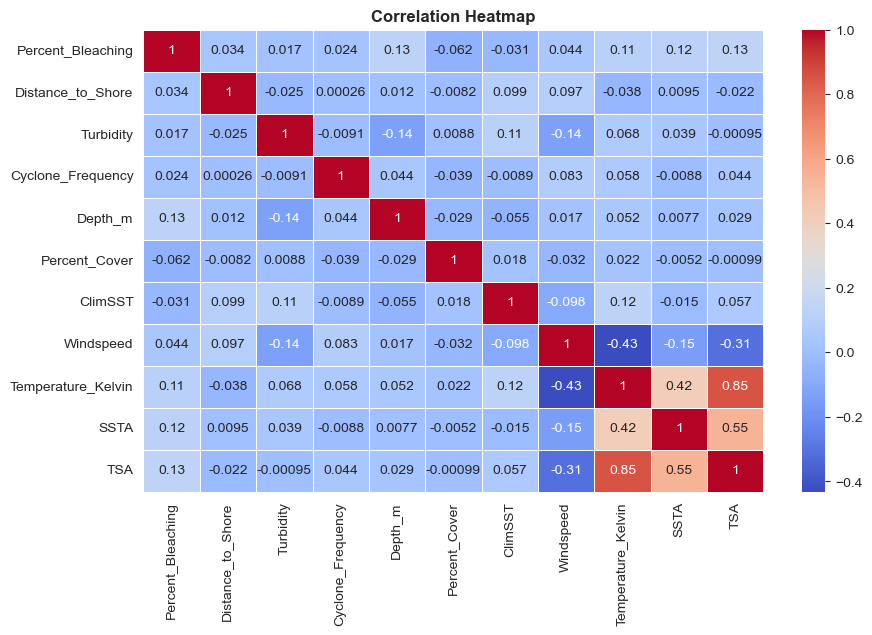

In [29]:
num_cols = ['Percent_Bleaching', 'Distance_to_Shore', 'Turbidity', 'Cyclone_Frequency', 'Depth_m', 'Percent_Cover','ClimSST', 'Windspeed', 'Temperature_Kelvin', 'SSTA', 'TSA']

plt.figure(figsize=(10, 6))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap", fontweight = 'bold')
plt.show();

- There is a strong positive correlation between Temperature_Kelvin and Thermal Stress Anomaly (TSA) (0.85), indicating that higher baseline temperatures are closely associated with increased thermal stress. Similarly, Sea Surface Temperature Anomaly (SSTA) shows a strong correlation with TSA (0.55), reinforcing their combined role as key indicators of thermal anomalies that contribute to coral bleaching. Additionally, SSTA has a moderate correlation with Temperature_Kelvin (0.42), suggesting a meaningful relationship between general sea temperature levels and short-term temperature deviations. In contrast, the remaining variables exhibit relatively weak or negligible correlations with each other, indicating limited linear associations.

# 4. Machine Learning models

## 4.1 Feature selection

- Recursive Feature Elimination method can reduce the risk of overfitting by choosing the most important features. However, removing important features can also lead to underfitting. 
- To address this issue, I paired with Random Forest to get best features out. 

In [30]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

features = [
    'Distance_to_Shore','Exposure', 'Turbidity', 'Cyclone_Frequency', 'Depth_m', 'Percent_Cover',
    'ClimSST', 'Windspeed', 'Temperature_Kelvin',
    'SSTA', 'TSA','Ocean_Name_Arabian Gulf', 'Ocean_Name_Atlantic', 'Ocean_Name_Indian', 'Ocean_Name_Pacific', 'Ocean_Name_Red Sea'
]
target_col = 'Percent_Bleaching_Category'
x = df[features]
y = df[target_col]

rf = RandomForestClassifier(random_state=101, n_estimators=100)
rfe = RFE(estimator=rf, n_features_to_select=10)
rfe.fit(x, y)

rfe_ranking = pd.DataFrame({
    'Feature': features,
    'Ranking': rfe.ranking_
})

In [31]:
rfe_ranking = rfe_ranking.sort_values(by='Ranking')
rfe_ranking

,Feature,Ranking
0,Distance_to_Shore,1
2,Turbidity,1
3,Cyclone_Frequency,1
4,Depth_m,1
5,Percent_Cover,1
6,ClimSST,1
7,Windspeed,1
8,Temperature_Kelvin,1
9,SSTA,1
10,TSA,1


In [32]:
important_features = x.columns[rfe.support_].tolist()
important_features

['Distance_to_Shore',
 'Turbidity',
 'Cyclone_Frequency',
 'Depth_m',
 'Percent_Cover',
 'ClimSST',
 'Windspeed',
 'Temperature_Kelvin',
 'SSTA',
 'TSA']

## 4.3 Data Splitting, StandardScaler and Handling Imbalanced

- Data splitting: The data is the splited into training (70%) and test (30%) 
- StandardScaler: The StandardScaler method is applied to standardize features by removing the mean and scaling them to unit variance, resulting in a mean of 0 and a standard deviation of 1
- SMOTE (Synthetic Minority Oversampling Technique): By resampling the training set after scaling, SMOTE helps the model learn from all classes effectively, reducing the risk of poor performance on minority classes

In [33]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

x = df[important_features]
y = df['Percent_Bleaching_Category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101, stratify=y)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

smote = SMOTE(random_state=101)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)


## 4.4 Classification Models

### 4.4.1 Random Forest

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100], 
    'max_depth': [10, 20],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=101), param_grid=param_grid, cv=5)
grid_search.fit(x_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [35]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
best_rf_model = grid_search.best_estimator_

y_pred_train_rf = best_rf_model.predict(x_train_resampled)
y_pred_test_rf = best_rf_model.predict(x_test_scaled)

accuracy_train_rf = accuracy_score(y_train_resampled, y_pred_train_rf)
report_train_rf = classification_report(y_train_resampled, y_pred_train_rf)
print(f"\nRandom Forest Training Accuracy: {accuracy_train_rf:.4f}")
print("Training Classification Report:\n", report_train_rf)

accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
report_test_rf = classification_report(y_test, y_pred_test_rf)
print(f"Random Forest Test Accuracy: {accuracy_test_rf:.4f}")
print("Test Classification Report:\n", report_test_rf)

mean_precision_rf = precision_score(y_test, y_pred_test_rf, average='macro')
mean_recall_rf = recall_score(y_test, y_pred_test_rf, average='macro')
mean_f1_score_rf = f1_score(y_test, y_pred_test_rf, average='macro')
print(f'Mean Precision: {mean_precision_rf:.4f}')
print(f'Mean Recall: {mean_recall_rf:.4f}')
print(f'Mean F1-Score: {mean_f1_score_rf:.4f}')


Random Forest Training Accuracy: 0.9787
Training Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.98     23982
         1.0       0.97      0.98      0.97     23982
         2.0       0.97      0.99      0.98     23982

    accuracy                           0.98     71946
   macro avg       0.98      0.98      0.98     71946
weighted avg       0.98      0.98      0.98     71946

Random Forest Test Accuracy: 0.8605
Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.92      0.93     10279
         1.0       0.48      0.57      0.52      1336
         2.0       0.50      0.59      0.54       740

    accuracy                           0.86     12355
   macro avg       0.64      0.69      0.67     12355
weighted avg       0.87      0.86      0.87     12355

Mean Precision: 0.6447
Mean Recall: 0.6933
Mean F1-Score: 0.6663


### 4.4.2 XGBoost

In [36]:
from xgboost import XGBClassifier
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=XGBClassifier(random_state=101, eval_metric='mlogloss'), 
                          param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}


In [37]:
best_xgb_model = grid_search.best_estimator_
y_pred_train_xgb = best_xgb_model.predict(x_train_resampled)
y_pred_test_xgb = best_xgb_model.predict(x_test_scaled)

accuracy_train_xgb = accuracy_score(y_train_resampled, y_pred_train_xgb)
report_train_xgb = classification_report(y_train_resampled, y_pred_train_xgb)
print(f"\nXGBoost Training Accuracy: {accuracy_train_xgb:.4f}")
print("Training Classification Report:\n", report_train_xgb)

accuracy_test_xgb = accuracy_score(y_test, y_pred_test_xgb)
report_test_xgb = classification_report(y_test, y_pred_test_xgb)
print(f"XGBoost Test Accuracy: {accuracy_test_xgb:.4f}")
print("Test Classification Report:\n", report_test_xgb)

mean_precision_xgb = precision_score(y_test, y_pred_test_xgb, average='macro')
mean_recall_xgb = recall_score(y_test, y_pred_test_xgb, average='macro')
mean_f1_score_xgb = f1_score(y_test, y_pred_test_xgb, average='macro')
print(f'Mean Precision: {mean_precision_xgb:.4f}')
print(f'Mean Recall: {mean_recall_xgb:.4f}') 
print(f'Mean F1-Score: {mean_f1_score_xgb:.4f}')



XGBoost Training Accuracy: 0.8207
Training Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.87      0.88     23982
         1.0       0.77      0.76      0.77     23982
         2.0       0.79      0.83      0.81     23982

    accuracy                           0.82     71946
   macro avg       0.82      0.82      0.82     71946
weighted avg       0.82      0.82      0.82     71946

XGBoost Test Accuracy: 0.8163
Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.87      0.91     10279
         1.0       0.40      0.52      0.45      1336
         2.0       0.37      0.65      0.47       740

    accuracy                           0.82     12355
   macro avg       0.57      0.68      0.61     12355
weighted avg       0.86      0.82      0.83     12355

Mean Precision: 0.5748
Mean Recall: 0.6769
Mean F1-Score: 0.6099


### 4.4.3 Stacking: RF + XGB → multinomial Logistic Regression

In [38]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
base_models = [
    ('rf', GridSearchCV(
        estimator=RandomForestClassifier(random_state=101),
        param_grid={
            'n_estimators': [50, 100],
            'max_depth': [10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        },
        cv=5
    )),
    ('xgb', GridSearchCV(
        estimator=XGBClassifier(random_state=101, eval_metric='mlogloss'),
        param_grid={
            'n_estimators': [50, 100],
            'max_depth': [3, 6],
            'learning_rate': [0.01, 0.1],
            'subsample': [0.8, 1.0]
        },
        cv=5
    ))
]

stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(multi_class='multinomial', random_state=101),
    cv=5,
    n_jobs=-1
)

stacking_model.fit(x_train_resampled, y_train_resampled)

c:\Users\phamn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


StackingClassifier(cv=5,
                   estimators=[('rf',
                                GridSearchCV(cv=5,
                                             estimator=RandomForestClassifier(random_state=101),
                                             param_grid={'max_depth': [10, 20],
                                                         'min_samples_leaf': [1,
                                                                              2],
                                                         'min_samples_split': [2,
                                                                               5],
                                                         'n_estimators': [50,
                                                                          100]})),
                               ('xgb',
                                GridSearchCV(cv=5,
                                             estimator=XGBClassifier(base_score=None,
                                                                     booster=None,
                                                                     callbacks=None,
                                                                     colsample_bylevel=None,
                                                                     colsample_byn...
                                                                     max_leaves=None,
                                                                     min_child_weight=None,
                                                                     missing=nan,
                                                                     monotone_constraints=None,
                                                                     multi_strategy=None,
                                                                     n_estimators=None,
                                                                     n_jobs=None,
                                                                     num_parallel_tree=None, ...),
                                             param_grid={'learning_rate': [0.01,
                                                                           0.1],
                                                         'max_depth': [3, 6],
                                                         'n_estimators': [50,
                                                                          100],
                                                         'subsample': [0.8,
                                                                       1.0]}))],
                   final_estimator=LogisticRegression(multi_class='multinomial',
                                                      random_state=101),
                   n_jobs=-1)

In [39]:
y_pred_train_stack = stacking_model.predict(x_train_resampled)
y_pred_test_stack = stacking_model.predict(x_test_scaled)

accuracy_train_stack = accuracy_score(y_train_resampled, y_pred_train_stack)
report_train_stack = classification_report(y_train_resampled, y_pred_train_stack)
print(f"\nStacking Training Accuracy: {accuracy_train_stack:.4f}")
print("Training Classification Report:\n", report_train_stack)

accuracy_test_stack = accuracy_score(y_test, y_pred_test_stack)
report_test_stack = classification_report(y_test, y_pred_test_stack)
print(f"Stacking Test Accuracy: {accuracy_test_stack:.4f}")
print("Test Classification Report:\n", report_test_stack)

mean_precision_stack = precision_score(y_test, y_pred_test_stack, average='macro')
mean_recall_stack = recall_score(y_test, y_pred_test_stack, average='macro')
mean_f1_score_stack = f1_score(y_test, y_pred_test_stack, average='macro')
print(f'Mean Precision: {mean_precision_xgb:.4f}')
print(f'Mean Recall: {mean_recall_xgb:.4f}') 
print(f'Mean F1-Score: {mean_f1_score_xgb:.4f}')



Stacking Training Accuracy: 0.9854
Training Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     23982
         1.0       0.98      0.99      0.98     23982
         2.0       0.98      0.99      0.99     23982

    accuracy                           0.99     71946
   macro avg       0.99      0.99      0.99     71946
weighted avg       0.99      0.99      0.99     71946

Stacking Test Accuracy: 0.8644
Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     10279
         1.0       0.49      0.58      0.54      1336
         2.0       0.53      0.51      0.52       740

    accuracy                           0.86     12355
   macro avg       0.66      0.67      0.66     12355
weighted avg       0.87      0.86      0.87     12355

Mean Precision: 0.5748
Mean Recall: 0.6769
Mean F1-Score: 0.6099


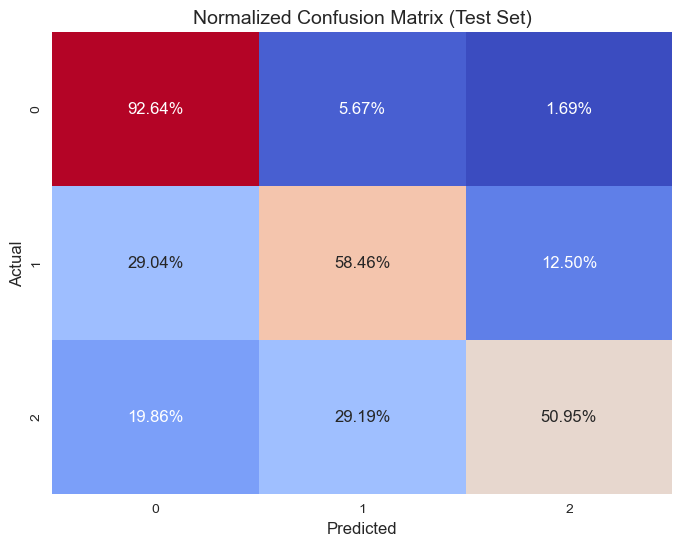

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test_stack)
plt.figure(figsize=(8, 6))
sns.heatmap(cm / cm.sum(axis=1, keepdims=True), annot=True, fmt='.2%', cmap='coolwarm', annot_kws={"size": 12},cbar=False)
plt.title('Normalized Confusion Matrix (Test Set)', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

# 5.0 Summary

## 5.1 Summary of Machine Learning models

In [41]:
table_result = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Stacking'],
    'Train Accuracy': [accuracy_train_rf, accuracy_train_xgb, accuracy_train_stack],
    'Test Accuracy': [accuracy_test_rf, accuracy_test_xgb, accuracy_test_stack],
    'Mean Precision': [mean_precision_rf, mean_precision_xgb, mean_precision_stack],
    'Mean Recall': [mean_recall_rf, mean_recall_xgb, mean_recall_stack],
    'Mean F1-Score': [mean_f1_score_rf, mean_f1_score_xgb, mean_f1_score_stack]
})
print(table_result)

           Model  Train Accuracy  Test Accuracy  Mean Precision  Mean Recall  \
0  Random Forest        0.978734       0.860542        0.644682     0.693316   
1        XGBoost        0.820657       0.816350        0.574829     0.676870   
2       Stacking        0.985364       0.864427        0.655392     0.673465   

   Mean F1-Score  
0       0.666325  
1       0.609944  
2       0.663093  


## 5.2 Visualize Feature Importance via each models

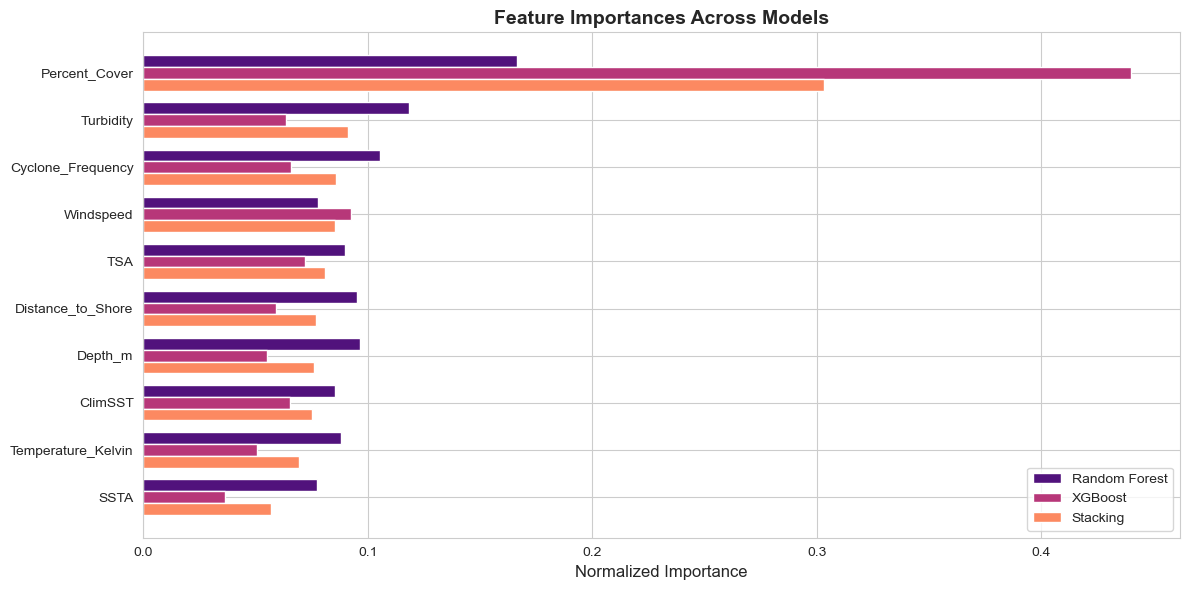

In [42]:
importances_df = pd.DataFrame({
    'Feature': important_features,
    'Random Forest': best_rf_model.feature_importances_,
    'XGBoost': best_xgb_model.feature_importances_
})

# Normalize the feature importances for comparison
importances_df['Random Forest'] /= importances_df['Random Forest'].sum()
importances_df['XGBoost'] /= importances_df['XGBoost'].sum()

# Calculate the average importance for stacking
importances_df['Stacking'] = importances_df[['Random Forest', 'XGBoost']].mean(axis=1)

importances_df = importances_df.sort_values(by='Stacking', ascending=False)


plt.figure(figsize=(12, 6))
indices = np.arange(len(importances_df))
plt.barh(indices - 0.25, importances_df['Random Forest'], height=0.25, label='Random Forest', color=sns.color_palette('magma', 3)[0])
plt.barh(indices, importances_df['XGBoost'], height=0.25, label='XGBoost', color=sns.color_palette('magma', 3)[1])
plt.barh(indices + 0.25, importances_df['Stacking'], height=0.25, label='Stacking', color=sns.color_palette('magma', 3)[2])

plt.yticks(indices, importances_df['Feature'])
plt.gca().invert_yaxis()
plt.xlabel('Normalized Importance', fontsize=12)
plt.title('Feature Importances Across Models', fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show();

## 5.3 SHapley Additive exPlanations

In [43]:
import shap

y_pred_proba_stack = stacking_model.predict_proba(x_train_resampled)

# Train a surrogate Random Forest on same inputs but labels = stacking predictions
surrogate = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
surrogate.fit(x_train_resampled, np.argmax(y_pred_proba_stack, axis=1))

explainer = shap.TreeExplainer(surrogate)
shap_values = explainer(x_test_scaled)


Waterfall plot for class 0


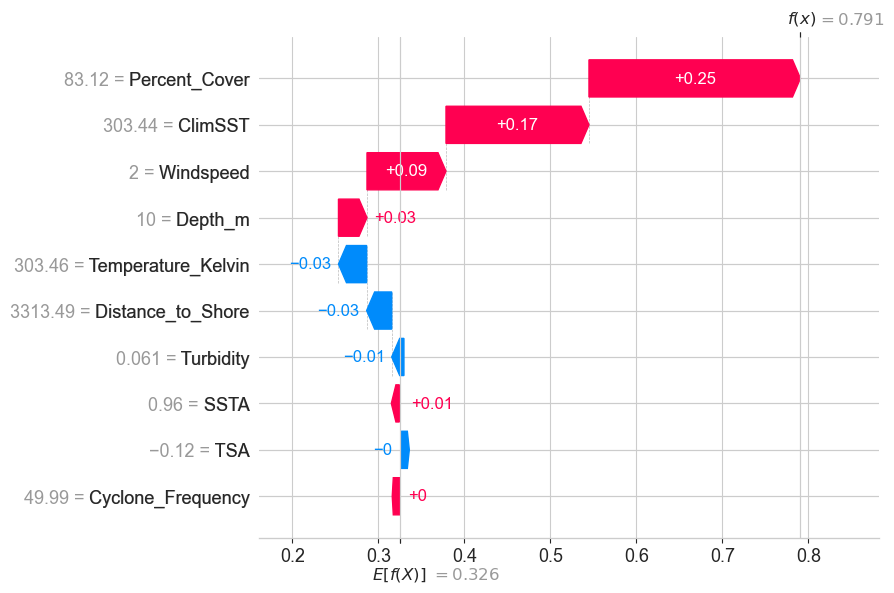


Waterfall plot for class 1


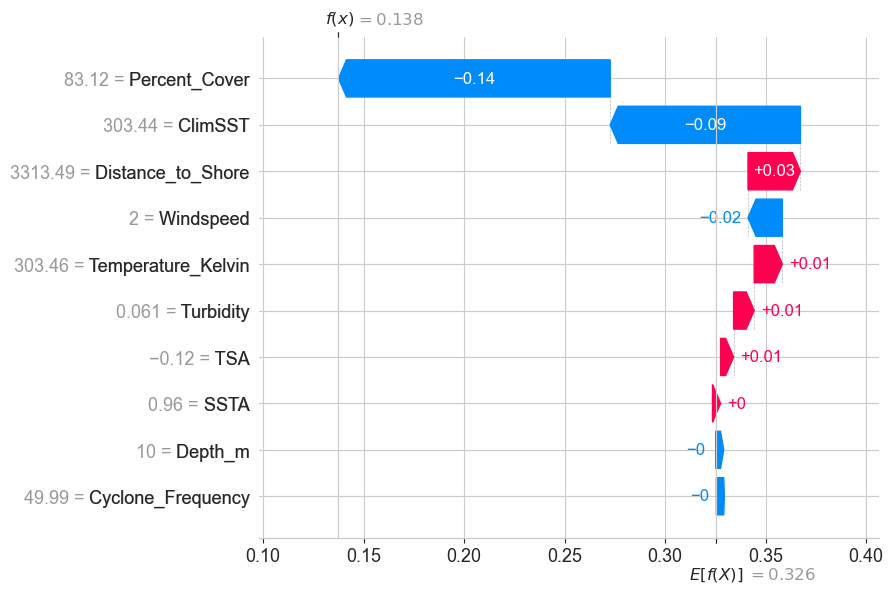


Waterfall plot for class 2


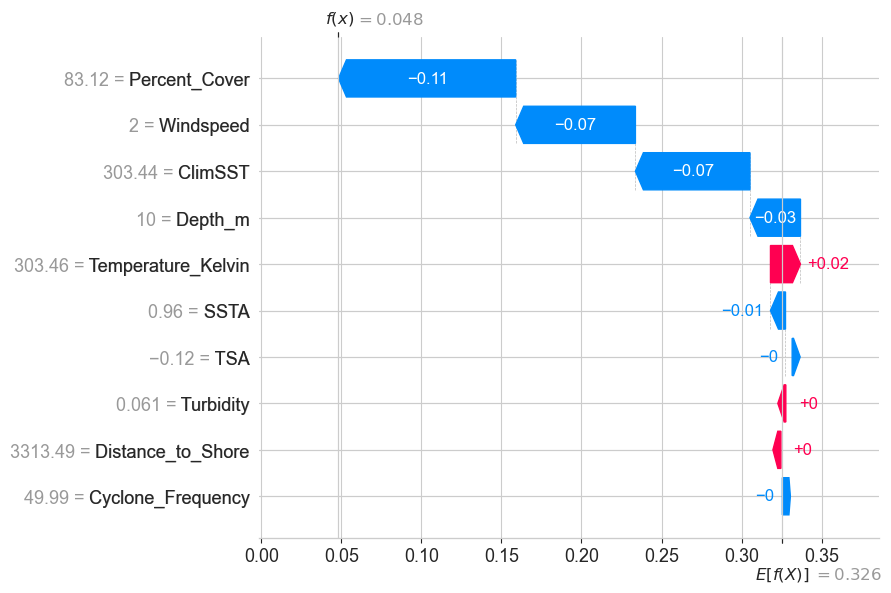

In [44]:
shap_explanation = shap.Explanation(
    values=shap_values.values,               
    base_values=explainer.expected_value,
    data=x_test[important_features].values,
    feature_names=important_features
)

# Plot waterfall for the first test sample, per class
for class_idx in range(3):
    print(f"\nWaterfall plot for class {class_idx}")
    shap.plots.waterfall(shap_explanation[0, :, class_idx])

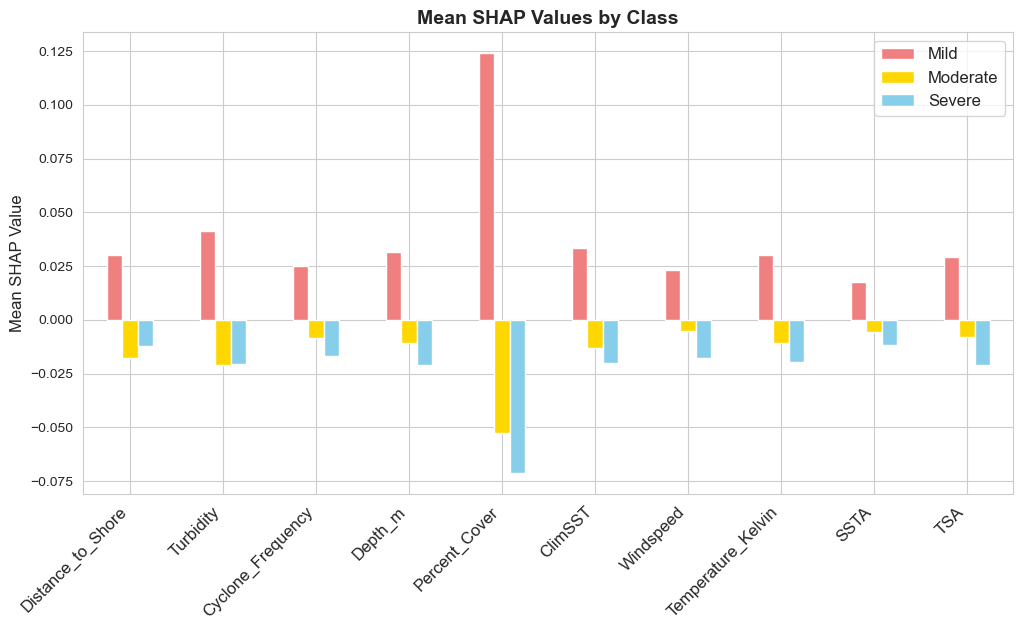

In [45]:
mean_0 = np.mean(shap_values.values[:, :, 0], axis=0) 
mean_1 = np.mean(shap_values.values[:, :, 1], axis=0) 
mean_2 = np.mean(shap_values.values[:, :, 2], axis=0)

df_mean_shap = pd.DataFrame({
    "Mild": mean_0,
    "Moderate": mean_1,
    "Severe": mean_2
}, index=important_features)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df_mean_shap.plot.bar(ax=ax, color=['lightcoral', 'gold', 'skyblue'])

ax.set_ylabel('Mean SHAP Value', fontsize=12)
ax.set_xticklabels(important_features, rotation=45, ha='right', fontsize=12)
ax.legend(fontsize=12)
plt.title("Mean SHAP Values by Class", fontsize=14, fontweight='bold')
plt.show()

In [46]:
# Align shap values to predicted class for each sample
preds = surrogate.predict(x_test_scaled)

new_shap_values = []
for i, pred in enumerate(preds):
    class_idx = list(surrogate.classes_).index(pred)
    new_shap_values.append(shap_values.values[i, :, class_idx])

new_shap_values = np.array(new_shap_values)

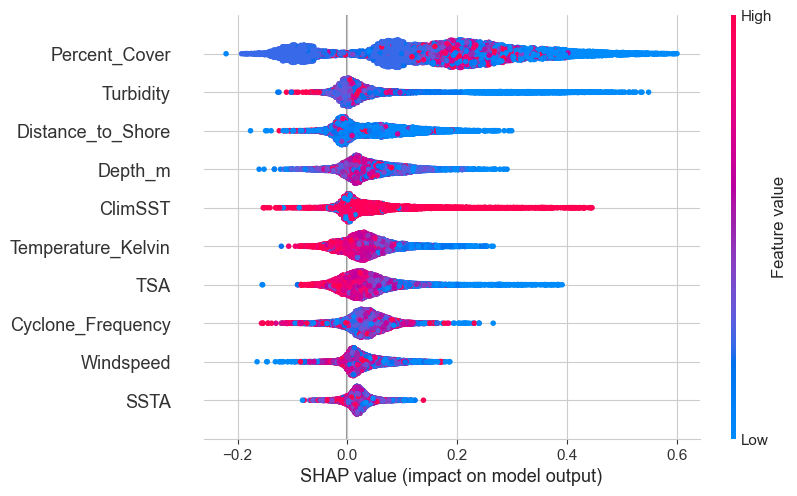

In [47]:
shap_explanation_pred = shap.Explanation(
    values=new_shap_values,
    base_values=shap_values.base_values,
    data=x_test_scaled,
    feature_names=important_features
)

# Beeswarm plot
shap.plots.beeswarm(shap_explanation_pred)

## 5.4 ”What-If” Intervention Analysis

Class probabilities using Stacking Model (on TEST set)
          Mean_Prob
Mild       0.795522
Moderate   0.139588
Severe     0.064890


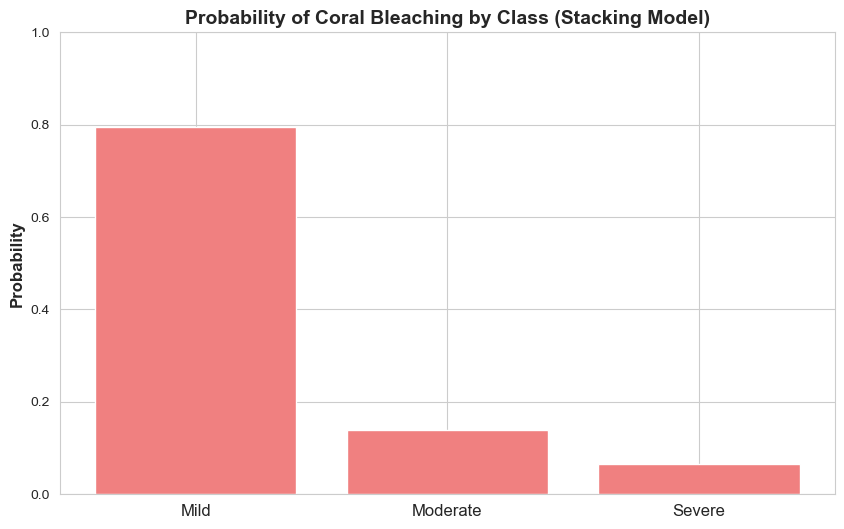

In [48]:
proba_test = stacking_model.predict_proba(x_test_scaled) 
proba_df = pd.DataFrame(proba_test, columns=["Mild","Moderate","Severe"])

mean_probs = proba_df.mean().to_frame("Mean_Prob")
print("Class probabilities using Stacking Model (on TEST set)")
print(mean_probs)

plt.figure(figsize=(10,6))
plt.bar(mean_probs.index, mean_probs["Mean_Prob"], color = "lightcoral")
plt.xticks(fontsize=12)
plt.ylabel("Probability", fontsize=12, fontweight='bold')
plt.title("Probability of Coral Bleaching by Class (Stacking Model)", fontsize=14, fontweight='bold')
plt.ylim(0,1)
plt.show()

In [49]:
modifiable = ["Percent_Cover", "Turbidity"]

# derive loose, realistic bounds from your TRAIN data distribution (quantile caps)
train_df = pd.DataFrame(x_train_resampled, columns=important_features)

bounds = {
    "Percent_Cover": {
        "min": float(train_df["Percent_Cover"].quantile(0.10)),  # avoid extreme lows
        "max": float(train_df["Percent_Cover"].quantile(0.95))   # realistic restoration cap
    },
    "Turbidity": {
        "min": float(train_df["Turbidity"].quantile(0.05)),      # avoid near-zero outliers
        "max": float(train_df["Turbidity"].quantile(0.90))       # keep within plausible range
    }
}

# intervention magnitudes (adjust to taste/policy)
deltas = {
    "Percent_Cover": +10.0,     # +10 percentage points cover (re-seeding)
    "Turbidity":      +0.01     # small increase (if ecologically acceptable)
}


def clip_series(s, lower, upper):
    return np.minimum(np.maximum(s, lower), upper)

x_base = x_test.copy()  
x_new  = x_base.copy()

# Apply nudges only on modifiable features
if "Percent_Cover" in x_new.columns:
    x_new["Percent_Cover"] = clip_series(
        x_new["Percent_Cover"] + deltas["Percent_Cover"], 
        bounds["Percent_Cover"]["min"], bounds["Percent_Cover"]["max"]
    )

if "Turbidity" in x_new.columns:
    x_new["Turbidity"] = clip_series(
        x_new["Turbidity"] + deltas["Turbidity"], 
        bounds["Turbidity"]["min"], bounds["Turbidity"]["max"]
    )

x_base_scaled = x_test_scaled
x_new_scaled  = scaler.transform(x_new[important_features])
proba_base = stacking_model.predict_proba(x_base_scaled)
proba_new  = stacking_model.predict_proba(x_new_scaled)

Class probabilities BEFORE vs AFTER feasible interventions
          Baseline  After_Intervention  Abs_Change  Rel_Change%
Mild        0.7955              0.8989      0.1033      12.9904
Moderate    0.1396              0.0925     -0.0470     -33.7061
Severe      0.0649              0.0086     -0.0563     -86.7495


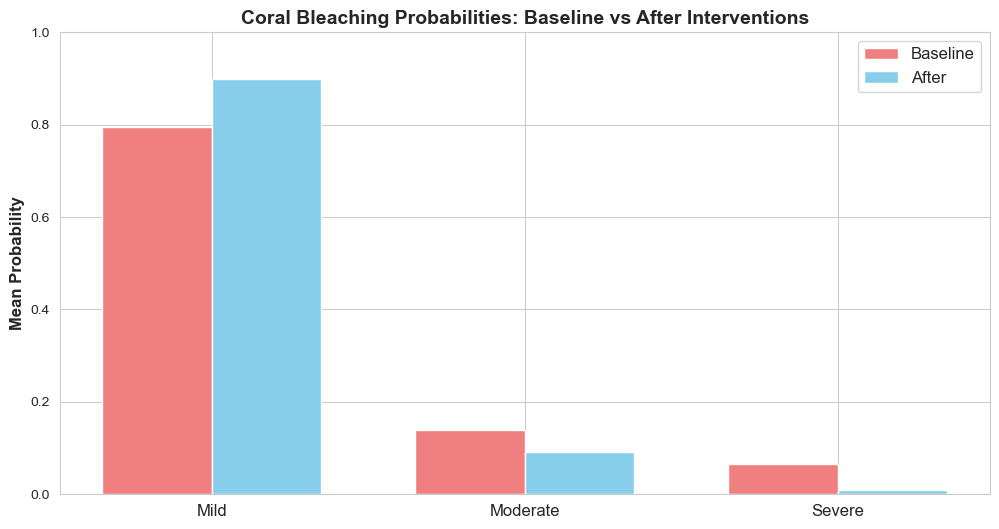

In [50]:
proba_base_df = pd.DataFrame(proba_base, columns=["Mild","Moderate","Severe"])
proba_new_df  = pd.DataFrame(proba_new,  columns=["Mild","Moderate","Severe"])

summary = pd.DataFrame({
    "Baseline": proba_base_df.mean(),
    "After_Intervention": proba_new_df.mean()
})
summary["Abs_Change"]  = summary["After_Intervention"] - summary["Baseline"]
summary["Rel_Change%"] = 100 * summary["Abs_Change"] / summary["Baseline"].replace(0, np.nan)

print("Class probabilities BEFORE vs AFTER feasible interventions")
print(summary.round(4))

# Visualize before/after
labels = ["Mild","Moderate","Severe"]
xpos = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(xpos - width/2, summary.loc[labels, "Baseline"], width, label="Baseline", color='lightcoral')
plt.bar(xpos + width/2, summary.loc[labels, "After_Intervention"], width, label="After", color='skyblue')
plt.xticks(xpos, labels, fontsize=12)
plt.ylabel("Mean Probability", fontsize=12, fontweight='bold')
plt.title("Coral Bleaching Probabilities: Baseline vs After Interventions", fontsize=14, fontweight='bold')
plt.ylim(0,1)
plt.legend(fontsize=12)
plt.show()